# Data Science For Good: DonorsChoose.org
## EDA and Data Cleaning (Part 1)

# Table of Contents

* [1. Introduction](#intro)
* [2. Loading the Data](#load)
* [3. Donations Table](#donation)
    * [3.1 Summary Statistics](#donationstats)
    * [3.2 Cleaning](#donationclean)
        * [3.2.1 Duplications](#donationduplication)
        * [3.2.2 Non-Citizen Transaction](#donationcitizen)
    * [3.3 EDA](#donationeda) 
        * [3.3.1 Number of Donations over 5 years by Unique Donors](#donationeda1)
        * [3.3.2 Distribution of Donation Amount](#donationeda2)
* [4. Project Table](#project)        
    * [4.1 Summary Statistics](#projectstats)
    * [4.2 Cleaning](#projectclean)
        * [4.2.1 Duplications](#projectduplication)
        * [4.2.2 Date Consistency](#projectdate)
        * [4.2.3 Missing Data](#projectmissing)
        * [4.2.4 Text Data](#projecttext)
    * [4.3 EDA](#projecteda) 
        * [4.3.1 Number of Projects issused from 2013-1 to 2018-5](#projecteda1)
        * [4.3.2 Number of Projects by Grade Level](#projecteda2)
* [5. Teacher Table](#teacher)        
    * [5.1 Summary Statistics](#teacherstats)
    * [5.2 EDA](#teachereda)       
         * [5.2.1 Number of Teachers by Prefix](#projecteda1)
* [6. School Table](#school)        
    * [6.1 Summary Statistics](#schoolstats)
    * [6.2 Cleaning](#schoolclean)
        * [6.2.1 Missing Data](#schoolmissing)
    * [6.3 EDA](#schooleda)
        * [6.3.1 Number of School by Metro Type](#schooleda1)
        * [6.3.2 Distribution of Percentage Free Lunch](#schooleda2)
        * [6.3.3 Number of Schools by State](#schooleda3)
* [7. Resources Table](#resource)
    * [7.1 Summary Statistics](#resourcestats)
    * [7.2 EDA](#resourceeda)
        * [7.2.1 Top 5 Resource Vendors](#resourceeda1)
        * [7.2.2 Bottom 5 Resource Vendorsh](#resourceeda2)    
        * [7.2.3 Word Cloud](#resourceeda3)  
* [8. Donor Table](#donor)
    * [8.1 Summary Statistics](#donorstats)
    * [8.2 EDA](#donoreda)
        * [8.2.1 Top 5 Donor States](#donoreda1)
        * [8.2.2 Teacher is Donor](#donoreda2)    
       
        



[Appendix](#appendix)

<a id='intro'></a>
# 1. Introduction

<b>What is Donors Choose?</b>

Founded in 2000 by a Bronx history teacher, DonorsChoose.org has raised $685 million for America's classrooms. Teachers at three-quarters of all the public schools in the U.S. have come to DonorsChoose.org to request what their students need, making DonorsChoose.org the leading platform for supporting public education.

To date, 3 million people and partners have funded 1.1 million DonorsChoose.org projects. But teachers still spend more than a billion dollars of their own money on classroom materials. To get students what they need to learn, the team at DonorsChoose.org needs to be able to connect donors with the projects that most inspire them.

In the second Kaggle Data Science for Good challenge, DonorsChoose.org, in partnership with Google.org, is inviting the community to help them pair up donors to the classroom requests that will most motivate them to make an additional gift. To support this challenge, DonorsChoose.org has supplied anonymized data on donor giving from the past five years. The winning methods will be implemented in DonorsChoose.org email marketing campaigns.

The aim of this notebook is to audit and clean the dataset, and perform an exploratory data analysis (EDA). Afterwards, we will create a recommendation system that enables DonorsChoose.org to build targeted email campaigns recommending specific classroom requests to prior donors.

# System Requirements and Python Libraries Used

Date: 07/06/2018

Version: 1.0

Computer Requirements: 16GB Ram

Environment: Python 3.6 and Jupyter notebook

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.tseries.offsets import MonthEnd
from wordcloud import WordCloud
import gc

<a id='load'></a>
# 2. Loading the Data

All of the data is loaded from the beginning. 
It consists of:
- Donations.CSV
- Projects.CSV
- Teachers.CSV
- Schools.CSV
- Donors.CSV

Each dataset will be audited and an EDA will be performed to uncover insights. Donations dataset will be covered first. 

In [2]:
donations_df = pd.read_csv("../Donations.csv")
projects_df = pd.read_csv("../Projects.csv")
teachers_df = pd.read_csv("../Teachers.csv")
schools_df = pd.read_csv("../Schools.csv")
resources_df = pd.read_csv("../Resources.csv")
donor_df = pd.read_csv("../Donors.csv")

c:\users\lawko698\documents\projects\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<a id='donation'></a>
# 3. Donations Data

Variables|Description
--|--
Project ID| Unique identifier of a project.
Donation ID| Unique identifier of a donation.
Donor ID| Unique identifier of a donor.
Donation Included Optional Donation| Whether or not the donation included an optional donation.
Donation Amount| The amount given to the project by the donor for this particular donation ID.
Donor Cart Sequence| This donation is in the donor’s 1st, 2nd, 3rd… nth checked out cart.
Donation Received Date| Date the donation was received.

In [3]:
donations_df.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23
2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46
3,000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04
4,000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38


In [4]:
donations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687884 entries, 0 to 4687883
Data columns (total 7 columns):
Project ID                             object
Donation ID                            object
Donor ID                               object
Donation Included Optional Donation    object
Donation Amount                        float64
Donor Cart Sequence                    int64
Donation Received Date                 object
dtypes: float64(1), int64(1), object(5)
memory usage: 250.4+ MB


All datatypes are correct besides 'Donation Received Date, we need to change it from object into date type.

In [5]:
donations_df['Donation Received Date'] = pd.to_datetime(donations_df['Donation Received Date'])

Let's look at a summary of the variables in the data frame.

In [6]:
#object types
donations_df.describe(include='O')

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation
count,4687884,4687884,4687884,4687884
unique,901965,4687844,2024554,2
top,c34218abf3fecd36be01305d67ed7fbb,72dacf54957263af310879da510c7724,39df9399f5384334a42905bcf0acdcbf,Yes
freq,863,2,18035,4001709


In [7]:
# Numeric type
donations_df.describe()

,Donation Amount,Donor Cart Sequence
count,4.687884e+06,4.687884e+06
mean,6.066879e+01,1.430545e+02
std,1.668996e+02,8.723086e+02
min,1.000000e-02,1.000000e+00
25%,1.482000e+01,1.000000e+00
50%,2.500000e+01,2.000000e+00
75%,5.000000e+01,1.200000e+01
max,6.000000e+04,1.811600e+04


<a id='donationstats'></a>
## 3.1 Summary Statistics Highlights
To highlight a few items of interest from the summary above:

- In Donation ID, there are 4,687,844 unique rows of transaction. We can assume each transaction is unique so this means there are 40 duplicates that occured (since the total number of rows is 4,687,844).
- There are 2,024,554 unique donors over the 5 years. Interestingly, a donor has donated 18,035 times over 5 years. In the [Kaggle discussion](https://www.kaggle.com/donorschoose/io/discussion/56030), it is mentioned the original dataset contains non-citizen donors (i.e. corporate donors) which may have been left behind in this dataset. We need to be aware the recommendation system is targeted towards citizens.
- A majority of transactions (4,001,709), donors agreed to split 15% of the donations to donor choose. 
- On average, the donation amount is \\$60.67. With the max amount \\$60,000 (a sign of corporate donation?) and the lowest amount is \$0.01 (quite stingy don't you agree?)
- Donor Cart Sequence has got up to 18,116 for a donor. This attribute provides information on the number of donations by each cart transaction. A donor can add a number of projects to a cart they will to donate.

We need to check the following:
- Transaction duplication
- Non-Citizen Donations

<a id='donationclean'></a>
## 3.2 Cleaning

<a id='donationduplication'></a>
### 3.2.1 Duplications

We should check transaction duplication.

In [8]:
#check if a specific transaction (Project, Donor, Donation ID) with transaction amount and date are duplicated
donations_df[donations_df.duplicated(["Project ID","Donation ID","Donor ID", "Donation Amount","Donation Received Date"])]

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date


There are no complete transaction duplications, but we should check for Donations ID duplications by omitting transaction amount and date.

In [9]:
#check if a specific transaction (Project, Donor, Donation ID) is duplicated
donations_df[donations_df.duplicated(["Project ID","Donor ID", "Donation ID"], keep=False)].head(5)

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
127589,06f4606a2248ae7785ad094d5cbe1a2b,c8689b5750748bdf987f7c2b1ce36c5b,2d6284a462aa2b787e7021f839bf2a00,Yes,284.85,27,2014-09-22 09:27:57
127590,06f4606a2248ae7785ad094d5cbe1a2b,c8689b5750748bdf987f7c2b1ce36c5b,2d6284a462aa2b787e7021f839bf2a00,Yes,284.85,27,2014-09-11 00:21:19
157022,0886c7155bfe57c488bcfc68adecc544,d93a8bb381345d10c75aa6e590eae257,d294743448126301ece771d0676bb413,Yes,445.25,8,2014-05-02 16:29:36
157034,0886c7155bfe57c488bcfc68adecc544,d93a8bb381345d10c75aa6e590eae257,d294743448126301ece771d0676bb413,Yes,445.25,8,2014-04-15 23:25:59
201918,0af60aa080317cbe8a601709f24c6dc5,ec7fedbc05656a1675898e325598101a,e6c65dccd40003ac42ea0501e9fb93ff,Yes,954.64,9,2015-09-22 09:27:17


In [10]:
#check if a specific transaction (Project, Donor, Donation ID) is duplicated
donations_df[donations_df.duplicated(["Donor ID", "Donation ID", "Project ID"], keep=False)]\
.sort_values('Donation Received Date').head(10)

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
3299386,b43249483eb6ff0bf76d0dd4684756ee,c86dde6bc2afe4b2a890789abb3d8551,e036a8085852f31da7582de3f6f014fc,Yes,309.35,41,2013-02-22 14:21:51
3299387,b43249483eb6ff0bf76d0dd4684756ee,c86dde6bc2afe4b2a890789abb3d8551,e036a8085852f31da7582de3f6f014fc,Yes,309.35,41,2013-03-05 10:34:37
1240259,43cfa5b34ac61d689e4824fafbd78949,e83f5814692fd70f1c6d47a5aaab8d9f,58a232138ff0bd9e74c769d31dad32c3,Yes,588.12,2,2013-03-07 14:15:14
1240257,43cfa5b34ac61d689e4824fafbd78949,e83f5814692fd70f1c6d47a5aaab8d9f,58a232138ff0bd9e74c769d31dad32c3,Yes,588.12,2,2013-03-25 12:06:56
3476176,bde25df08651975ad588e10e0f17ed26,357e5fdff3ca7f8b64ebe1fb0aa66d1c,859217395aa48f97c1da90242990eac0,Yes,483.94,31,2013-05-26 01:47:00
3476183,bde25df08651975ad588e10e0f17ed26,357e5fdff3ca7f8b64ebe1fb0aa66d1c,859217395aa48f97c1da90242990eac0,Yes,483.94,31,2013-06-07 15:05:30
4247333,e7a6696e2ee80ec3c9a003e8cd006b09,0e324a11b7f09ffc5f6a943f7b2df295,859217395aa48f97c1da90242990eac0,Yes,768.43,36,2013-07-21 23:19:07
4247340,e7a6696e2ee80ec3c9a003e8cd006b09,0e324a11b7f09ffc5f6a943f7b2df295,859217395aa48f97c1da90242990eac0,Yes,768.43,36,2013-07-29 21:09:11
2585733,8d3eec21d85cc0f436a2a8fe1b884c47,6b13948221ef4efd75b67667feabd91c,a5d29df4c39019a4b2e48b16ce233ff5,Yes,1283.24,6,2013-12-08 14:10:28
2585731,8d3eec21d85cc0f436a2a8fe1b884c47,6b13948221ef4efd75b67667feabd91c,a5d29df4c39019a4b2e48b16ce233ff5,Yes,1283.24,6,2013-12-16 14:42:45


From the results, we can see there are transaction duplications as Project ID, Donation ID, Donor ID and Donation amount are the same, but it occurs on different dates. 

Although it may seem like the donor may have decided to make another transaction (of the same amount) to the same project two conflicts occur: 
1. Donations ID should be unique
2. Donor Cart Sequence should be different

Therefore, we should drop the earlier transactions.

In [11]:
donations_df.drop_duplicates(["Donor ID", "Donation ID", "Project ID"], keep='last', inplace=True)

In [12]:
#Duplications are gone
donations_df.describe(include='O')

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation
count,4687844,4687844,4687844,4687844
unique,901965,4687844,2024554,2
top,c34218abf3fecd36be01305d67ed7fbb,7e1ac3953d1afb7abce4d71fa872b51b,39df9399f5384334a42905bcf0acdcbf,Yes
freq,863,1,18035,4001679


<a id='donationcitizen'></a>
### 3.2.2 Non-Citizen Donations

In [13]:
donations_df["Donor ID"].value_counts().to_frame().reset_index()\
.rename(columns={'index':'Donor ID','Donor ID':'Number of Donations'}).head()

,Donor ID,Number of Donations
0,39df9399f5384334a42905bcf0acdcbf,18035
1,237db43817f34988f9d543ca518be4ee,14565
2,a0e1d358aa17745ff3d3f4e4909356f3,10515
3,6f74ffb17cbb2b616b1eef06bd4acd0c,9029
4,a1929a1172ad0b3d14bc84f54018c563,6427


In the first row, the donor has made 18,035 donations. This means the donor has made more than 1 donations per day. Initially, it may seem the first row is a corporate donor, however, it is best to observe the donation amount over the time period. 

In [14]:
donations_df.loc[donations_df["Donor ID"] == '39df9399f5384334a42905bcf0acdcbf'].sort_values("Donor Cart Sequence").head(8)

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
1174182,4030d515447cbc46f60e1a454ccb97ea,182609e664a24ab33fcb682ca219a33e,39df9399f5384334a42905bcf0acdcbf,Yes,1.99,2,2016-03-09 11:00:09
1174184,4030d515447cbc46f60e1a454ccb97ea,6b68260365ca15ba76bcabc496f86225,39df9399f5384334a42905bcf0acdcbf,Yes,1.47,3,2016-03-09 11:01:42
1174186,4030d515447cbc46f60e1a454ccb97ea,e8ccba216818da063d21c28a263c010f,39df9399f5384334a42905bcf0acdcbf,Yes,1.06,4,2016-03-09 11:02:15
1174183,4030d515447cbc46f60e1a454ccb97ea,c79f2dd38e3df73b281eb81c9f41bf02,39df9399f5384334a42905bcf0acdcbf,Yes,1.00,5,2016-03-09 11:03:11
3710334,ca751521f73caa9035b075a4c52ee769,1c28a6facde43d774cbe7aef9f4a54fb,39df9399f5384334a42905bcf0acdcbf,Yes,1.00,7,2016-03-09 17:53:14
3710329,ca751521f73caa9035b075a4c52ee769,ace70e33621b6d13a39bc07b83d90367,39df9399f5384334a42905bcf0acdcbf,Yes,1.00,8,2016-03-09 21:59:56
3710342,ca751521f73caa9035b075a4c52ee769,1c87477737411000fb9bfe61ef31f540,39df9399f5384334a42905bcf0acdcbf,Yes,1.81,9,2016-03-09 22:13:48
3710375,ca751521f73caa9035b075a4c52ee769,c1e2437bbdde37074e0e11bb6a1b89a9,39df9399f5384334a42905bcf0acdcbf,Yes,1.00,10,2016-03-10 09:23:25


In [15]:
donor_timeline = donations_df.loc[donations_df["Donor ID"] == '39df9399f5384334a42905bcf0acdcbf']
donor_timeline['Date'] = donor_timeline['Donation Received Date'].dt.strftime('%Y-%m-%d')
timeline = donor_timeline.groupby('Date').sum()["Donation Amount"].to_frame()

c:\users\lawko698\documents\projects\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


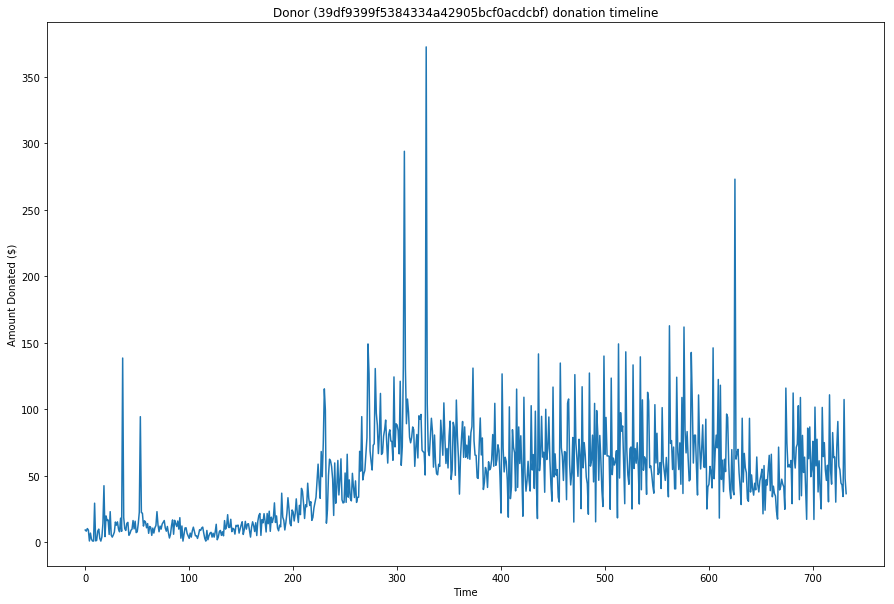

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))
x = np.arange(0,len(timeline.index),1)
plt.plot(x,timeline)
ax.set_title('Donor (39df9399f5384334a42905bcf0acdcbf) donation timeline')
ax.set_ylabel("Amount Donated ($)")
ax.set_xlabel("Time")
plt.show()

In [17]:
# Total amount donated
donations_df.loc[donations_df["Donor ID"] == '39df9399f5384334a42905bcf0acdcbf']['Donation Amount'].sum()

37121.72

Over 2+ years, this donor has made a total donation of \\$37,121.72 which is made up of small individual donations. Out of 732 days, the person donates \\$50.7 per day. Donating $18,505 per year is a large amount, but feasible if the donor has a high income. Therefore, it can be assumed this person is not a corporate donor. 

Below, there is an example of a corporate donor.

In [18]:
donations_df.loc[donations_df["Donor ID"] == 'a0e1d358aa17745ff3d3f4e4909356f3'].sort_values("Donor Cart Sequence").head(10)

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
3322162,b572adce8fcecb58c60c8729ff0acea6,eda7593bdc4f9fe3970dcea4049c3607,a0e1d358aa17745ff3d3f4e4909356f3,Yes,300.00,461,2013-01-15 10:23:38
1021920,37edae113125c68ed8b9da40387985ea,de3a449f1620c7948eddf544f109cf8a,a0e1d358aa17745ff3d3f4e4909356f3,Yes,250.00,465,2013-01-21 19:28:13
1680744,5bc41175d3a3a3ddc215f4052d16cd2d,35203a972bfeaf75e58bcced7d6503a7,a0e1d358aa17745ff3d3f4e4909356f3,Yes,200.00,466,2013-01-23 21:48:37
2055795,707b722be029323e62c1daef65b835ea,c9079514af0250bf2b97e2f14d78157a,a0e1d358aa17745ff3d3f4e4909356f3,Yes,500.00,466,2013-01-23 21:48:35
249096,0d7d23db6a8f76e8d87aa14bdfa6c2c2,96515e22996b2106d1d83b07af93bb2f,a0e1d358aa17745ff3d3f4e4909356f3,Yes,315.00,469,2013-01-26 16:45:42
43456,024782ae9f652ac662f8cc55fd2f050c,b383b3b86267d0cc2fd60c3765ae3f97,a0e1d358aa17745ff3d3f4e4909356f3,Yes,50.00,470,2013-01-26 19:00:55
2487007,87f1c70280054217816601f11a875e21,19efd7e3fe15d0eb2d00214b2be935ad,a0e1d358aa17745ff3d3f4e4909356f3,Yes,405.47,470,2013-01-26 19:01:08
3913798,d577a9c2bc69a263c432b400447916ae,f1f8a87d333d2d36f089b8379636122c,a0e1d358aa17745ff3d3f4e4909356f3,Yes,240.00,475,2013-01-27 20:01:51
1437206,4e8d7677c141b6d94a43a8f29fdda7cc,49f5f402d28e58ab0525213614c031e4,a0e1d358aa17745ff3d3f4e4909356f3,Yes,100.00,475,2013-01-27 20:01:51
752999,29022c229095680229a976fa65fa702a,72de438a4dd427700e652c3aec972d16,a0e1d358aa17745ff3d3f4e4909356f3,Yes,175.00,475,2013-01-27 20:01:51


In [19]:
donor_timeline = donations_df.loc[donations_df["Donor ID"] == 'a0e1d358aa17745ff3d3f4e4909356f3']
donor_timeline['Date'] = donor_timeline['Donation Received Date'].dt.strftime('%Y-%m-%d')
timeline = donor_timeline.groupby('Date').sum()["Donation Amount"].to_frame()

c:\users\lawko698\documents\projects\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


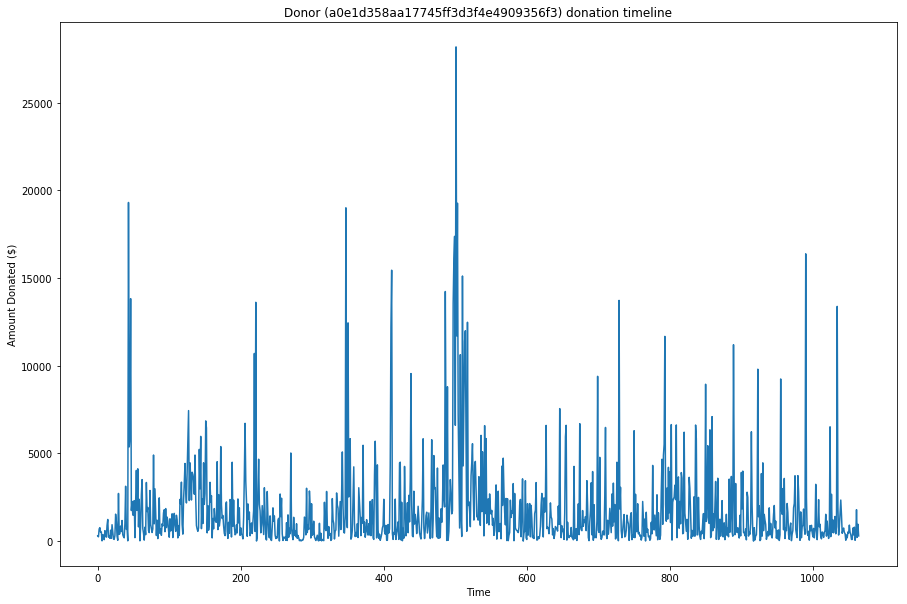

In [20]:
fig, ax = plt.subplots(figsize=(15, 10))
x = np.arange(0,len(timeline.index),1)
plt.plot(x,timeline)
ax.set_title('Donor (a0e1d358aa17745ff3d3f4e4909356f3) donation timeline')
ax.set_ylabel("Amount Donated ($)")
ax.set_xlabel("Time")
plt.show()

In [21]:
# Total amount donated
donations_df.loc[donations_df["Donor ID"] == 'a0e1d358aa17745ff3d3f4e4909356f3']['Donation Amount'].sum()

1879624.97

For almost 3 years, this donor has made a total donation of \\$1,879,624.97 which is made up of large individual donations. Out of 1,064 days, the person donates \$1,766.56 per day. Donating \\$644,796 per year is an extremely large amount only feasible if the donor is a millionaire? Therefore, it can be assumed this person is a corporate donor. 

In order to filter out these corporate donors, we will need to detect outliers who are frequent donors with large amounts of donations similar to the donor above.

In [22]:
donate_freq = donations_df["Donor ID"].value_counts().to_frame().reset_index()\
.rename(columns={'index':'Donor ID','Donor ID':'Number of Donations'})
#select donors who have donated frequently. Every day for the whole time period.
donate_freq_list = donations_df["Donor ID"].value_counts().to_frame().reset_index()\
.loc[donate_freq['Number of Donations'] > 1800]['index']

In [23]:
donate_amount_list = []
donor_id_list = []
for i in donate_freq_list:
    start_date = donations_df.loc[donations_df["Donor ID"] == i]['Donation Received Date']\
    .to_frame().sort_values('Donation Received Date')["Donation Received Date"].iloc[1]
    end_date = donations_df.loc[donations_df["Donor ID"] == i]['Donation Received Date']\
    .to_frame().sort_values('Donation Received Date')["Donation Received Date"].iloc[-1]
    diff_date = end_date - start_date
    amount = donations_df.loc[donations_df["Donor ID"] == i]['Donation Amount'].sum()
    donor_id_list.append(i)
    donate_amount_list.append(amount/diff_date.days)

In [24]:
amount_df = pd.DataFrame({'Donor ID':donor_id_list, 'Amount per day':donate_amount_list})
amount_df = amount_df[['Donor ID', 'Amount per day']]
amount_df.sort_values('Amount per day', ascending=False).head(10).reset_index(drop=True)

,Donor ID,Amount per day
0,f9dd79ea006fee7bb4a5cc8473d8656c,1043.498035
1,a0e1d358aa17745ff3d3f4e4909356f3,974.403821
2,d006be7223c048ae8b2bdedd7dd2b4db,663.204069
3,2144d56b1947ebb26a19e7f1d07c970a,638.690134
4,96c4f21513cd8962acb147ab384e6434,589.450271
5,0e01e632606c230914fe73c2d2ccead3,162.364749
6,e7692ca3a0fe35653c173de80adfc880,86.936897
7,86d57a6264726b2a94c5b9663f46330c,84.886686
8,a747520b8d27d36d2f929f2b12e243ab,79.303688
9,24ecca49933c30a0beb83090591720c0,65.874155


From the table above, index 0 to 4 the yearly spending is above \$200,000. These numbers are extremely large in which an ordinary person will not be achieve. Therefore, these donor's will be dropped from the dataset.

In [25]:
drop_list = amount_df.sort_values('Amount per day', ascending=False)['Donor ID'][:5]
drop_list_index = donations_df[donations_df['Donor ID'].isin(drop_list)].index
donations_df = donations_df.drop(drop_list_index).reset_index(drop=True)

<a id='donationeda'></a>
## 3.3 EDA

<a id='donationeda1'></a>
### 3.3.1 Number of Donations over 5 years by Unique Donors

In [26]:
# Count the number of donations by donor ID
donor_count = donations_df["Donor ID"].value_counts()
donor_counts = donor_count.rename_axis('donor_id').to_frame('counts')
donor_index = ["1","2","3","4","5","6 and above"]

In [27]:
#graph processing
values = []
for x in range(1,7):
    if x <=5:
        values.append(donor_counts[donor_counts["counts"] == x].count()[0])
    else:
        values.append(donor_counts[donor_counts["counts"] >= x].count()[0])

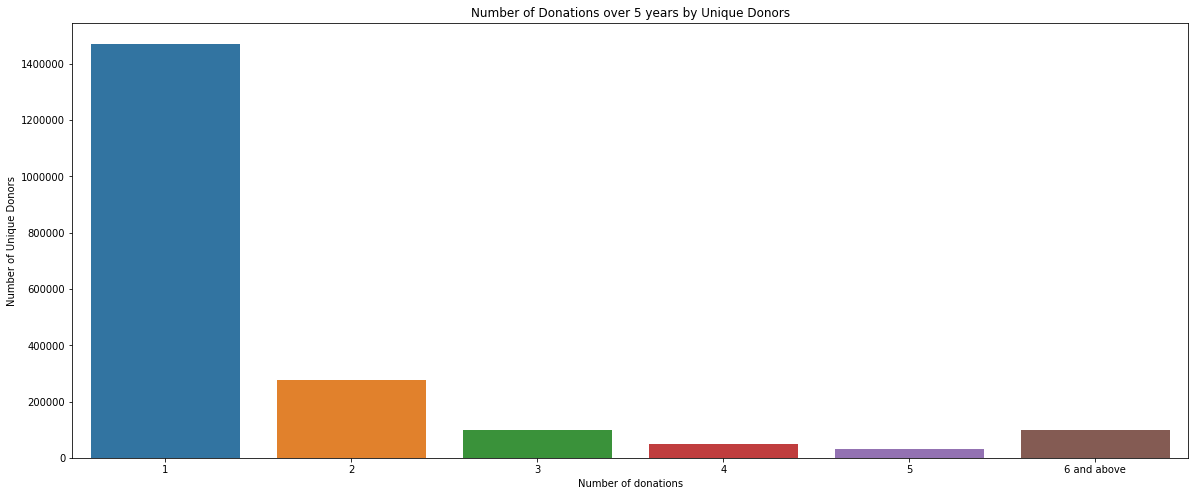

In [28]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(donor_index, values)
ax.set_title('Number of Donations over 5 years by Unique Donors')
ax.set_ylabel("Number of Unique Donors")
ax.set_xlabel("Number of donations")
plt.show()

<a id='donationeda2'></a>
### 3.3.2 Distribution of Donation Amount

In [29]:
# store donation amount for graphing
donate_amount = donations_df["Donation Amount"]

c:\users\lawko698\documents\projects\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


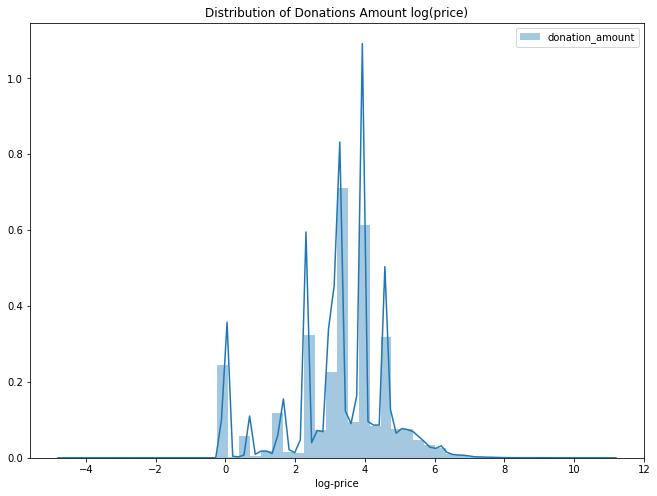

In [30]:
fig, ax = plt.subplots(figsize=(11, 8))
ax.set_title('Distribution of Donations Amount log(price)')
sns.distplot(np.log(donate_amount), label = 'donation_amount', axlabel = 'log-price')
plt.legend()
plt.show()

From the graph above, we can see a few spikes of donation amounts. Log(price) was used since it was highly skewed to the right. To see the common donation amount, we plotted the graph without log of price and zoomed into certain thresholds shown below.

c:\users\lawko698\documents\projects\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


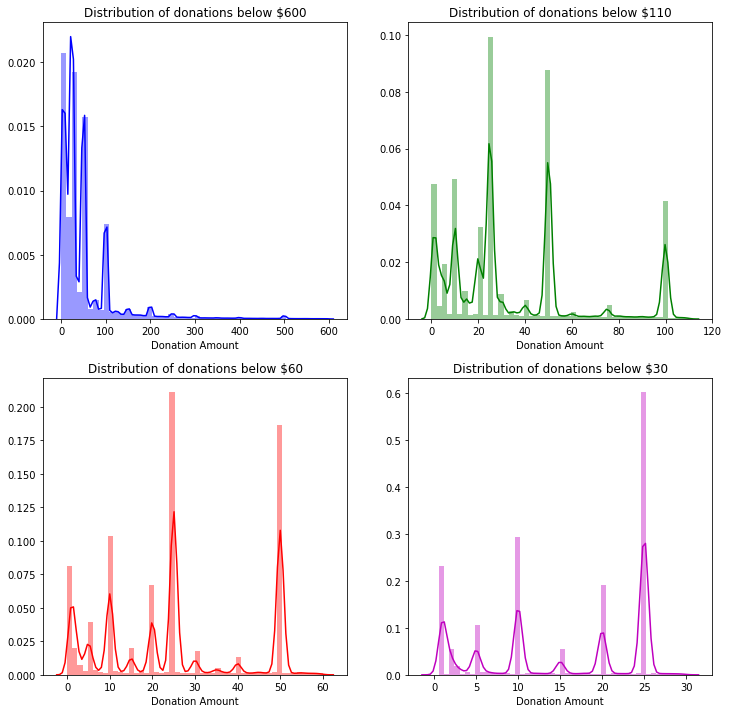

In [31]:
# create 4 subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
ax[0,0].set_title('Distribution of donations below $600')
sns.distplot(donate_amount[donate_amount < 600], label = 'donation_amount' , color="b", ax=ax[0, 0])
ax[0,1].set_title('Distribution of donations below $110')
sns.distplot(donate_amount[donate_amount < 110], label = 'donation_amount' , color="g", ax=ax[0, 1])
ax[1,0].set_title('Distribution of donations below $60')
sns.distplot(donate_amount[donate_amount < 60], label = 'donation_amount' , color="r", ax=ax[1, 0])
ax[1,1].set_title('Distribution of donations below $30')
sns.distplot(donate_amount[donate_amount < 30], label = 'donation_amount' , color="m", ax=ax[1, 1])

From the graphs above, donation amounts spikes at \\$100, \\$50, \\$25, \\$15, \\$10, \\$1. 
The top three donation amounts are \\$25, \\$50, \\$10.

In [32]:
donations_df.to_csv("adj_donations.csv", index=False)
del donations_df, donor_timeline, donate_amount, drop_list, drop_list_index, donate_amount_list, donor_id_list,\
donate_freq, donate_freq_list
gc.collect()

12483

<a id='project'></a>
# 4. Project Data

Variables|Description
--|--
Project ID| Unique identifier of a project.
School ID| Unique identifier of a school.
Teacher ID| Unique identifier of a teacher.
Teacher Project Posted Sequence| The teacher’s 1st, 2nd, 3rd… nth posted project.
Project Type| “Teacher-Led”, “Student-Led”, or “Professional Development”.
Project Title| Title of project given by the teacher.
Project Essay| Contains essay text written by the teacher describing their students and how the items will be used in their classroom.
Project short description| The first 198 characters of the essay followed by ellipses. This used to appear on a project card as donors are browsing through the Search page. It is no longer used for this purpose.
Project need statement|A description of resources requested written by the teacher. This text appears on a project card as donors are browsing through the Search page.
Project Subject Category Tree| Every project can have either one or two subject categories. This is a comma-separated list of those subject categories.
Project Subject Subcategory Tree| For every project subject category, there is also a project subject subcategory that contains greater specificity.
Project Grade Level Category| One of four categories describing the grade level of students.
Project Resource Category| The types of items being requested by a teacher. There were five resource categories prior to October 10, 2017. After this date, there are fourteen. Prior to October 10, 2017, these categories were selected by teachers during project creation. After October 10, 2017, these categories were predicted via algorithm at roughly 95% accuracy.
Project Cost| This cost includes materials cost + fees associated with project fulfillment. It’s the total a teacher must raise to have a project fully funded and receive their materials.
Project Posted Date| The date on which a project was published on our site for people to donate to.
Project expiration date| A project is typically live on the site for 4 months after it is posted. The expiration date is the date in which the project will no longer be eligible to receive donations.
Project Current Status| “Fully Funded”, “Expired”, or “Live”. A project is typically live for 4 months after being posted. After that date, if a project is not “Fully Funded”, it is marked “Expired”. At any point in time after a project is posted, a staff member or the teacher can take the project off the site by “Archiving” the project for various reasons.
Project Fully Funded Date| If project was fully funded, this is the date on which the project received full funding.


In [33]:
projects_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110017 entries, 0 to 1110016
Data columns (total 18 columns):
Project ID                          1110017 non-null object
School ID                           1110017 non-null object
Teacher ID                          1110017 non-null object
Teacher Project Posted Sequence     1110017 non-null int64
Project Type                        1110017 non-null object
Project Title                       1110011 non-null object
Project Essay                       1110016 non-null object
Project Short Description           1110014 non-null object
Project Need Statement              1110014 non-null object
Project Subject Category Tree       1109988 non-null object
Project Subject Subcategory Tree    1109988 non-null object
Project Grade Level Category        1110017 non-null object
Project Resource Category           1109981 non-null object
Project Cost                        1110017 non-null float64
Project Posted Date                 1110017 non

From the information, there are 1,110,017 rows of data.

- There a few null variables such as Fully Funded Date as not all projects are fully funded
- Three date variables need to be converted to date datatype.

We will correct the date datatype and provide DataFrame summary.

In [34]:
# Correct Project Fully Funded Date
projects_df['Project Fully Funded Date'] = pd.to_datetime(projects_df['Project Fully Funded Date'], format='%Y-%m-%d')

In [35]:
# Correct Project Expiration Date
projects_df['Project Expiration Date'] = pd.to_datetime(projects_df['Project Expiration Date'], format='%Y-%m-%d')

In [36]:
# Correct Project Posted Date
projects_df['Project Posted Date'] = pd.to_datetime(projects_df['Project Posted Date'], format='%Y-%m-%d')

In [37]:
projects_df.describe(include='O')

,Project ID,School ID,Teacher ID,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Current Status
count,1110017,1110017,1110017,1110017,1110011,1110016,1110014,1110014,1109988,1109988,1110017,1109981,1110017
unique,1110015,72361,395706,3,926127,1108272,841893,1080023,51,432,5,17,3
top,c940d0e78b7559573aca536db90c0646,7f0412c9ac3cea57048543879e4e6318,fa2f220b537e8653fb48878ebb38044d,Teacher-Led,Flexible Seating,Remember all the required reading you did as a...,As a teacher in a low-income/high poverty scho...,My students need a document camera.,Literacy & Language,"Literacy, Mathematics",Grades PreK-2,Supplies,Fully Funded
freq,2,1752,320,1092163,1107,14,2139,578,250504,93286,432002,386074,826764


In [38]:
projects_df.describe()

,Teacher Project Posted Sequence,Project Cost
count,1.110017e+06,1.110017e+06
mean,1.124050e+01,7.415240e+02
std,2.595475e+01,1.083256e+03
min,1.000000e+00,3.529000e+01
25%,1.000000e+00,3.351200e+02
50%,3.000000e+00,5.153500e+02
75%,9.000000e+00,8.675200e+02
max,4.970000e+02,2.557377e+05


In [39]:
projects_df['Project Resource Category'].unique()

array(['Technology', 'Supplies', 'Books', 'Other', 'Trips', 'Visitors',
       nan, 'Sports & Exercise Equipment', 'Computers & Tablets',
       'Flexible Seating', 'Reading Nooks, Desks & Storage',
       'Educational Kits & Games', 'Instructional Technology',
       'Art Supplies', 'Classroom Basics', 'Lab Equipment',
       'Food, Clothing & Hygiene', 'Musical Instruments'], dtype=object)

<a id='projectstats'></a>
## 4.1 Summary Statistics Highlights

To highlight a few items of interest from the summary above:

- In Project ID, there are 1,110,017 unique rows of transaction. There are two duplicates. 
- A school has requested 1,752 project donations over 5 years.
- A teacher was responsible for 320 projects postings.
- Not every project has a title, essay, description or statement.
- Missing information for some variables are detected, such as Project Subject Category Tree.
- There are 17 Project Resource Categories as opposed to 14 mentioned in the data dictionary
- Natural language processing will be required for text information for particular variables.

We need to check the following:
- Data duplication
- Check date consistency
- Any missing data.
- Text data.

<a id='projectclean'></a>
## 4.2 Cleaning

<a id='projectduplication'></a>
### 4.2.1 Duplications

We should check data duplication by "Project ID", "School ID", "Teacher ID".

In [40]:
projects_df[projects_df.duplicated(["Project ID", "School ID", "Teacher ID"], keep=False)]

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
983393,99c07777fdcf63d3a0fdb4a0deb4b012,de69b6ee78c74d4356bf3302a649fb1e,05f09b29bc8fd4f3cc10fc75eccbb573,11,Teacher-Led,Newspaper Advisers Learn Financial Literacy in...,Period 6 in Room 428 is a hub of activity as s...,Period 6 in Room 428 is a hub of activity as s...,"For the journalism conference, I need a reason...","History & Civics, Literacy & Language","Financial Literacy, Literature & Writing",Grades 9-12,Trips,644.29,2018-01-07,2018-03-13,Fully Funded,2018-01-07
983535,99c07777fdcf63d3a0fdb4a0deb4b012,de69b6ee78c74d4356bf3302a649fb1e,05f09b29bc8fd4f3cc10fc75eccbb573,11,Professional Development,Newspaper Advisers Learn Financial Literacy in...,Period 6 in Room 428 is a hub of activity as s...,Period 6 in Room 428 is a hub of activity as s...,"For the journalism conference, I need a reason...","History & Civics, Literacy & Language","Financial Literacy, Literature & Writing",Grades 9-12,Trips,644.29,2018-01-07,2018-03-13,Fully Funded,2018-01-07
1041063,c940d0e78b7559573aca536db90c0646,5e1132a3628825b31f329a70fcec7030,69b63ccd52afd09ef3963b4cc3b15d00,1,Teacher-Led,Creative Computing in Scratch (3-8),Ms. Sheila!!! \n\nI'm sooooo excited we are...,Ms. Sheila!!! \n\nI'm sooooo excited we are go...,My students need access to trained teachers in...,Special Needs,Special Needs,Grades 3-5,Trips,2421.14,2018-03-21,2018-06-03,Fully Funded,2018-03-27
1041433,c940d0e78b7559573aca536db90c0646,5e1132a3628825b31f329a70fcec7030,69b63ccd52afd09ef3963b4cc3b15d00,1,Professional Development,Creative Computing in Scratch (3-8),Ms. Sheila!!! \n\nI'm sooooo excited we are...,Ms. Sheila!!! \n\nI'm sooooo excited we are go...,My students need access to trained teachers in...,Special Needs,Special Needs,Grades 3-5,Trips,2421.14,2018-03-21,2018-06-03,Fully Funded,2018-03-27


From the Project Short Description, both duplicated projects are about Professional Development. Therefore, we will drop the alternative.

In [41]:
projects_df = projects_df.drop([983393,1041063]).reset_index()

<a id='projectdate'></a>
### 4.2.2 Date Consistency

There are three date attributes. We need to check consistency between them with 'Project Posted Date' as the start, 'Project Expiration Date' as the end and 'Project Fully Funded Date' as the attribute between posted and expiration date, if funds are met.

We will look at differences between 'Project Posted Date' and 'Project Fully Funded Date'.

In [42]:
fully_funded_dif = (projects_df['Project Fully Funded Date'] - projects_df['Project Posted Date']).dt.days

In [43]:
fully_funded_dif[fully_funded_dif < 0]

Series([], dtype: float64)

From above, the start and end dates are consistent.

Next, we look at differences between 'Project Posted Date' and 'Project Expiration Date'.

In [44]:
#Number of Project Posted Date and Project Expiration Date discrepancies.
expiration_dif = (projects_df['Project Expiration Date'] - projects_df['Project Posted Date']).dt.days
expiration_dif[expiration_dif < 0].rename_axis('index').reset_index(name='difference').tail()

,index,difference
24,650136,-242.0
25,651345,-245.0
26,683267,-232.0
27,816993,-91.0
28,856965,-222.0


From the results, we see 29 projects have expiry dates before its posted date. 

In [45]:
#view the rows with inconsistent dates
projects_df.iloc[expiration_dif[expiration_dif < 0].rename_axis('index').reset_index(name='difference')['index']].head()

,index,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
37296,37296,8642f1ea45a97eb718acfdd3d9a5519e,f11201d1d230b2f88516f08d77e9e0df,5baaf5433b7ce16f36c08bdb9ac59938,34,Teacher-Led,iPad I Could Manage My Finances,"Last year, the average 12th grader scored a 48...","Last year, the average 12th grader scored a 48...",My students need two iPad Minis with cases to ...,"History & Civics, Math & Science","Economics, Mathematics",Grades 3-5,Technology,979.99,2013-06-10,2013-05-22,Expired,NaT
52773,52773,0937c98163c488242d814836c67db2f2,074f9ab3c74470f36d76624d78e36426,b336c5b8b5c068ef8fd2aac81c75d78f,3,Teacher-Led,Listen And Learn!,When was the last time you got lost in a story...,When was the last time you got lost in a story...,My students need books with a CD to listen to ...,Literacy & Language,Literacy,Grades PreK-2,Books,358.31,2013-08-09,2013-01-16,Expired,NaT
64029,64029,611e036d76b8c5c6af7ae97b64c76174,28c5e7e1ee98f1690a04746aa333d946,9a5a447cbc9034d79c85515f02aa7d40,3,Teacher-Led,Expanding Our Imagination,The students in my classroom are Pre-Kindergar...,The students in my classroom are Pre-Kindergar...,My students need a career costume set.,"Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Supplies,489.61,2013-09-01,2013-01-06,Expired,NaT
104804,104804,f866dc3ee7865507f3d8bd9ab48a4d29,d6d6a9fd089bb62d792eee24e46412c5,b8bc25dec3289f0f62ac58ce868de458,2,Teacher-Led,Finding Our Inner Daedalus: How High Can We Go?,"Daedalus, an inventor in Greek myth, used his ...","Daedalus, an inventor in Greek myth, used his ...","My students need a weather balloon, camera and...",Math & Science,"Applied Sciences, Environmental Science",Grades 9-12,Technology,754.74,2013-11-05,2013-01-04,Fully Funded,2013-11-23
172874,172874,c86d3825106cc22f61e608ac8d40a2fd,ccb78bd205740f8571e210f31c719aa9,c098bf7ea0626d20de7dc215efa39518,1,Teacher-Led,Nature in Focus: Using Short Videos to Teach S...,Science teachers frequently scour the Web for ...,Science teachers frequently scour the Web for ...,My students need a camera to create educationa...,Math & Science,Applied Sciences,Grades 9-12,Technology,345.58,2014-06-06,2014-06-02,Expired,NaT


From the table above, we should split the treatment into two. One for projects that has expired and the other when it has been Fully Funded. 
There are many ways to treat the inconsistant date, but the approach will be conducted below:
- When a project has been fully funded, the expiry date is adjusted to the end of the month of the fully funded date.
- When a project has expired, the posted date is swapped with expiry date

Swapping dates for expired projects.

In [46]:
#extract index of inconsistent dates
expire_index = expiration_dif[expiration_dif < 0].rename_axis('index').index.values
#extract dates from Project Expiration Date
expire_swap = projects_df.loc[(projects_df.index.isin(expire_index)) & (projects_df['Project Current Status'] == 'Expired')]\
['Project Expiration Date']
#extract dates from Project Posted Date
posted_swap = projects_df.loc[(projects_df.index.isin(expire_index)) & (projects_df['Project Current Status'] == 'Expired')]\
['Project Posted Date']

In [47]:
#swap Project Expiration Date
for ind in posted_swap.index:
    projects_df.loc[(projects_df.index == ind),'Project Expiration Date'] = posted_swap[ind] 

In [48]:
#swap Project Posted Date
for ind in expire_swap.index:
    projects_df.loc[(projects_df.index == ind),'Project Posted Date'] = expire_swap[ind] 

Adjust expiry dates to end of month.

In [49]:
#extract projects fully funded date inconsistencies
funded_index = projects_df.loc[(projects_df.index.isin(expire_index)) & (projects_df['Project Current Status'] == 'Fully Funded')].index
#extract Project Fully Funded Date and extend to end of month
end_months = pd.to_datetime(projects_df.loc[projects_df.index.isin(funded_index),'Project Fully Funded Date'], format="%Y%m") + MonthEnd(1)

In [50]:
#Insert new extended dates to Project Expiration Date
for ind in funded_index:
    projects_df.loc[(projects_df.index == ind),'Project Expiration Date'] = end_months[ind] 

Next, we look at differences between 'Project Fully Funded Date'' and 'Project Expiration Date'.

In [51]:
expiration_fund_dif= (projects_df['Project Expiration Date'] - projects_df['Project Fully Funded Date']).dt.days
expiration_fund_dif[expiration_fund_dif < 0].head(10)

429     -3.0
8456    -2.0
9675    -4.0
11416   -8.0
11422   -9.0
15863   -5.0
25768   -3.0
26764   -3.0
29416   -3.0
31025   -2.0
dtype: float64

In [52]:
expiration_fund_dif[expiration_fund_dif < 0].loc[expiration_fund_dif[expiration_fund_dif < 0] < -30]

46795    -39.0
66296    -36.0
70281    -32.0
89607    -53.0
110801   -50.0
113494   -44.0
118417   -34.0
129979   -50.0
352363   -34.0
356557   -57.0
360556   -49.0
361399   -33.0
361525   -33.0
363365   -38.0
365659   -45.0
371516   -32.0
398421   -33.0
413772   -31.0
dtype: float64

There are a large number of projects funded after the expiration date (370 instances). It may not be an error as the system could have allowed last minute donations to fund a project beyond its expiration date, but there are concerns regarding 18 projects that was fully funded after 30 days of its expiration date. I will not be treating these dates for now as there may be an underlying reason not yet known.  

<a id='projectmissing'></a>
### 4.2.3 Missing Data

In [53]:
missing_values_count = projects_df.isnull().sum()
missing_values_count

index                                    0
Project ID                               0
School ID                                0
Teacher ID                               0
Teacher Project Posted Sequence          0
Project Type                             0
Project Title                            6
Project Essay                            1
Project Short Description                3
Project Need Statement                   3
Project Subject Category Tree           29
Project Subject Subcategory Tree        29
Project Grade Level Category             0
Project Resource Category               36
Project Cost                             0
Project Posted Date                      0
Project Expiration Date                 14
Project Current Status                   0
Project Fully Funded Date           283253
dtype: int64

From the results, we should look at the projects with missing data and those with missing expiration dates.

In [54]:
projects_df[projects_df['Project Title'].isnull()]

,index,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
142320,142320,09165ccdb88069f1fd0821d17f67e8ac,c5153dc1a7fa516c65b12bca6eb142f2,9d7781abf19779f00b38b8cad924d271,2,Teacher-Led,NaN,"I currently work in a Title 1, Georgia Lightho...","I currently work in a Title 1, Georgia Lightho...",My students need 2 iPod touches in order to ha...,Math & Science,Health & Life Science,Grades 6-8,Technology,545.39,2014-02-20,2014-06-19,Fully Funded,2014-05-06
196195,196195,ea1c7396e65d402827849eeba3ab9120,8f60536294db21912ecfc2133b2ecb85,7efa50dfb7731a9678848d769ebd435c,1,Teacher-Led,NaN,Remember being bored in math class? My studen...,Remember being bored in math class? My student...,My students need all craft items to help us cr...,Math & Science,Mathematics,Grades 6-8,Supplies,508.40,2014-08-15,2014-12-04,Fully Funded,2014-09-09
294201,294201,a8c96095fd93881ec10434b5e1d6b57e,b986495dba3392fca2591eb21c74306a,646520f9c8d2ec96b1fe77640305cef3,1,Teacher-Led,NaN,A typical day in this class is not so typical....,A typical day in this class is not so typical....,"My students need camera and tripod, microphone...",History & Civics,"Financial Literacy, Social Sciences",Grades 9-12,Technology,1831.79,2015-01-25,2015-05-23,Fully Funded,2015-04-06
318542,318542,8b2e34de68d1a927d293fdb6c0acaa20,5c50b38afcefb593aee7bb84abd4a93e,2670b960fd37b5f3db045165e6fbe3a5,2,Teacher-Led,NaN,Students with an iPad + a green screen kit = e...,Students with an iPad + a green screen kit = e...,My students need a green real green screen kit...,"Applied Learning, Music & The Arts","Other, Performing Arts",Grades 3-5,Supplies,260.31,2015-03-25,2015-07-24,Fully Funded,2015-04-01
483138,483138,516233b21d0e260446d7ba01c7cb41a8,3bdd3276abf45c93aaeb28f175620c49,cea88e2dea6392296713ccb6a5126f9b,1,Student-Led,NaN,<!--DONOTREMOVEESSAYDIVIDER--><!--DONOTREMOVEE...,NaN,NaN,Applied Learning,"College & Career Prep, Other",Grades 9-12,Supplies,2626.01,2016-02-11,2016-06-08,Fully Funded,2016-02-11
624153,624153,291af3598593ba5441f0012f6a2f87d9,982191afd0907fea06f1e8af484ecd17,1faccb93af3e5d900b236a237eaeb8c1,1,Teacher-Led,NaN,<!--DONOTREMOVEESSAYDIVIDER-->,NaN,My students need,"Health & Sports, Special Needs","Health & Wellness, Special Needs",Grades 3-5,Supplies,318.26,2016-09-05,2017-01-03,Fully Funded,2016-10-12


From the results, some projects do not have a title, essay, description or statements. 

In [55]:
# check missing Project Subject Category Tree
projects_df[projects_df['Project Subject Category Tree'].isnull()].head()

,index,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
3036,3036,25bb4db94056ec38ba7ed1ee96e90006,a0f96a034959cb0073ebfb513e3ed6d2,d1458f69a8299227c6e6843aef9458a4,4,Teacher-Led,Puzzled No More,"""Life is a puzzle. Putting it together is a c...","""Life is a puzzle. Putting it together is a ch...",My students need unique puzzles to help them l...,NaN,NaN,Grades PreK-2,NaN,599.40,2013-01-15,2013-06-12,Expired,NaT
3095,3095,c77ecc1b330f1d53ee32d9e6d9d8e122,a0f96a034959cb0073ebfb513e3ed6d2,d1458f69a8299227c6e6843aef9458a4,5,Teacher-Led,Raise Your Hand for Hands on Learning,I am worried about the amount of paper used co...,I am worried about the amount of paper used co...,My students need materials they can get their ...,NaN,NaN,Grades PreK-2,NaN,549.67,2013-01-15,2013-06-12,Expired,NaT
3468,3468,ad20e709465c2e16795b62cf935a7b62,501b003322cb2be7590610ed7022962e,2dda73aebc2bef219d7e3d760cb8e5d3,2,Teacher-Led,Sack It,It's a new year and time to get organized. Al...,It's a new year and time to get organized. Alb...,My students need seat sacks to help organize c...,NaN,NaN,Grades 3-5,NaN,291.18,2013-01-17,2013-06-16,Expired,NaT
5311,5311,b6e02d589c1a3d232f5a80f3cf91b78b,ea77b86cbfce2575e75b9c5c1e6d8607,976d728020ee45655519d1768851f993,7,Teacher-Led,Gaining Confidence Through Interactive Reading,Do you remember sitting in reading circles or ...,Do you remember sitting in reading circles or ...,My students need leveled readers. We have a sm...,NaN,NaN,Grades PreK-2,NaN,330.14,2013-01-23,2013-05-20,Expired,NaT
7417,7417,240e287212370de10fbf27ef133d987e,4ad625f945b8081d0cf2070f83a4b14b,2b3d66c326ed24bc7384490a0bc3cbfe,52,Teacher-Led,"Authentic Learning, Authentic Materials",Who better to create materials for children th...,Who better to create materials for children th...,"My students need resources for reading, math, ...",NaN,NaN,Grades PreK-2,NaN,175.74,2013-01-29,2013-05-25,Fully Funded,2013-02-01


From the results, those missing Subject Category Tree will not include Subcategory Tree (since it is dependent) and Project Resource Category.

These fields will be left as it is, since missing information can affect how these projects are funded. However, there are missing expiration dates which shouldn't exist, which we will look at next. 

In [56]:
# view missing expiration dates
projects_df[ (projects_df['Project Expiration Date'].isnull())].head()

,index,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
599357,599357,80780c6333c69834f59a059f4ff15a99,4d7e38427352f919a5a5f22100ed2e91,b5020abe43df4bb251ca4daa4e99f983,2,Teacher-Led,Wobble To Wisdom,Because of our school's close proximity to New...,Because of our school's close proximity to New...,My students need Wobble Chairs to replace thei...,Health & Sports,Health & Wellness,Grades PreK-2,Supplies,954.11,2016-08-21,NaT,Expired,NaT
606453,606453,f4433bd3e073c91c49184887374a1de9,d95275ec006a92830c71392b07062df4,c99c7f2c25aa01b1166d8146730e953b,3,Teacher-Led,We Are Mathematicians!,My students live in the South Shore and South ...,My students live in the South Shore and South ...,"My students need Didax AD1 Unifix cubes, a Rel...",Math & Science,"Applied Sciences, Mathematics",Grades PreK-2,Supplies,173.82,2016-08-25,NaT,Expired,NaT
660319,660319,2f366b31eca5e0b14cd2873c05f2047e,f55e24cd0ec4f27361243174cc58870e,3c52088f463f8b82812bd30ced8b611c,1,Teacher-Led,Super Science Low-Fi Maker Cart,My science lab classrooms consist of a variety...,My science lab classrooms consist of a variety...,My students need a maker space full of enginee...,"Math & Science, Special Needs","Applied Sciences, Special Needs",Grades 3-5,Supplies,411.15,2016-10-14,NaT,Expired,NaT
725486,725486,4ce9f5357f4e2e4914efe5bae5bbf5d0,3dab5b08f819833c7a140f1a8c104739,13afa1892e96aa456b538499e412f588,1,Teacher-Led,Community Carpet,My second graders are the best kids in town! \...,My second graders are the best kids in town! \...,My students need a classroom carpet for Read A...,Literacy & Language,"Literacy, Literature & Writing",Grades PreK-2,Supplies,607.27,2017-01-27,NaT,Expired,NaT
849340,849340,a4766eb8d9fde972f9f586cbba794ff6,271dafdd99ed7dd1dcaeeb605897e237,0f27baa43c7bd6ae0aec397f9df20caa,1,Teacher-Led,Scope Magazine,"My diverse students are in school every day, e...",My students are in need of experiencing more n...,My students need a subscription to SCOPE Magaz...,Literacy & Language,Literature & Writing,Grades 6-8,Books,493.94,2017-08-15,NaT,Expired,NaT


From the results, we will impute the missing dates by calculating the average project length until expiration.

In [57]:
#store dataset with missing Project Expiration Date 
expire_date_null = projects_df[projects_df['Project Expiration Date'].isnull()]
#store dataset with complete Project Expiration Date
project_impute_expire = projects_df[projects_df['Project Expiration Date'].notnull()]

In [58]:
# obtain difference between Project Expiration Date and Project Posted Date
expiration_days_impute = (project_impute_expire['Project Expiration Date'] - project_impute_expire['Project Posted Date']).dt.days

In [59]:
# calculate average length until expiration
avg_period = expiration_days_impute.mean().round()
# compute expiration dates for missing data
added_days = expire_date_null['Project Posted Date'] + pd.Timedelta(avg_period, unit='D')

In [60]:
# fill in missing data
for ind in added_days.index:
    projects_df.loc[projects_df.index == ind,'Project Expiration Date'] = added_days[ind]

In [61]:
# confirm changes
projects_df[ (projects_df['Project Expiration Date'].isnull())]

,index,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date


<a id='projecttext'></a>
### 4.2.3 Text Data

We take a look at a few project's text data.

In [62]:
#Project Essay ex1
projects_df.iloc[483138,7]

'<!--DONOTREMOVEESSAYDIVIDER--><!--DONOTREMOVEESSAYDIVIDER--><!--DONOTREMOVEESSAYDIVIDER--><!--DONOTREMOVEESSAYDIVIDER--><!--DONOTREMOVEESSAYDIVIDER-->'

In [63]:
#Project Essay ex2
projects_df.iloc[568632,7]

"In my classroom, students are not exposed to current events or world news. Many students come from homes that do not have a computer/Internet. Having a newspaper is considered a luxury. The majority of the students can't tell me what is going on in the world today.\n\nMy students are curious and inquisitive.\nThey want to learn; and take interest on current events that happen in the world. So much of what they see is negative. I want to expose them to important factual information, as well as positive things that are happening.<!--DONOTREMOVEESSAYDIVIDER-->Our current social studies texts are old. They have not been updated in over ten years. The Time for Kids will allow the children to learn about current events in the classroom. They will also be able to see what other children in the world are doing. The magazines offer online access to further in-depth questions which will strengthen student comprehension.\n\nThis project will allow my students to be well rounded individuals.\n\nT

Coding artefacts exist in the fields which need to be removed. 

In [64]:
projects_df.iloc[456153]

index                                                                          456153
Project ID                                           b5ab82af9a6ecfb8804261c8d168f57d
School ID                                            d3a4e23841c3b6aa7ad8fdf199e27d01
Teacher ID                                           7270dd20e2612882c62a0d6b856f6ad6
Teacher Project Posted Sequence                                                    33
Project Type                                                              Teacher-Led
Project Title                                                    Math Is FUNdamental!
Project Essay                       Please help my students improve their access t...
Project Short Description           Please help my students improve their access t...
Project Need Statement              My students need magnetic base ten blocks, wri...
Project Subject Category Tree                           Math & Science, Special Needs
Project Subject Subcategory Tree                      

In [65]:
#Project Essay 
projects_df.iloc[456153,7]

'Please help my students improve their access to mathematics resources in the classroom! We need magnetic base 10 blocks, write and wipe fraction decimal number lines and multiplying fractions kits. It so important for my students to have the same learning opportunities as other children! <!--DONOTREMOVEESSAYDIVIDER-->I am a fifth grade, special education teacher in a high-need area of New York City. This is my seventh year teaching in a newly formed elementary school that focuses on creating leaders in the community. I have twenty-four students in a cooperative team teaching fifth grade classroom. Most of my students receive free lunch. My special education and ESL students need these mathematics supplies and resources to prepare them for learning in the classroom. My students want to succeed but require more resources and materials in order to be successful! <!--DONOTREMOVEESSAYDIVIDER-->With your support, my students will be able to have these resources!  The magnetic base 10 blocks

In [66]:
#Project Short Description
projects_df.iloc[456153,8]

'Please help my students improve their access to mathematics resources in the classroom! We need magnetic base 10 blocks, write and wipe fraction decimal number lines and multiplying fractions...'

Project Short Description is the beginning of the project essay.

In [67]:
#Project Need Statement
projects_df.iloc[456153,9]

'My students need magnetic base ten blocks, write and wipe fraction and decimal number lines and multiplying fractions kit.'

In [68]:
# Remove <!--DONOTREMOVEESSAYDIVIDER-->
projects_df['Project Essay'] = projects_df.loc[(projects_df['Project Essay'].notnull()),'Project Essay']\
.apply(lambda x: x.replace('<!--DONOTREMOVEESSAYDIVIDER-->',''))                               

In [69]:
#find index with string length less than 100
projects_df['Project Essay'].loc[projects_df['Project Essay'].str.len() < 100]

483138    
624153    
Name: Project Essay, dtype: object

After removing <\!--DONOTREMOVEESSAYDIVIDER--\>, we have two rows with an empty 'Project Essay'.

After a brief look at the text data, there doesn't seem to be much cleaning required.

<a id='projecteda'></a>
## 4.3 EDA

<a id='projecteda1'></a>
### 4.3.1 Number of Projects issused from 2013-1 to 2018-5

In [70]:
# chart pre-processing
proj_issue_time = projects_df['Project Posted Date'].to_frame()
proj_issue_time['date'] = projects_df['Project Posted Date'].dt.to_period('m')
project_chart = proj_issue_time.groupby('date').count()

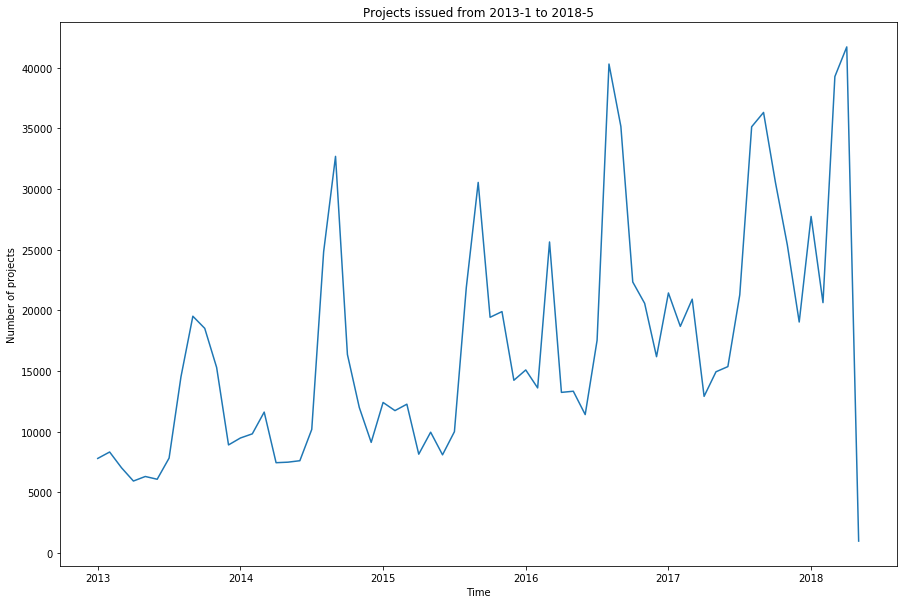

In [71]:
fig, ax = plt.subplots(figsize=(15, 10))
x = np.arange(0,len(project_chart.index),1)
plt.plot(x,project_chart)
year = np.arange(0,len(project_chart.index),12)
ax.set_xticks(year)
ax.set_xticklabels(np.arange(2013,2019,1))
ax.set_title('Projects issued from 2013-1 to 2018-5')
ax.set_ylabel("Number of projects")
ax.set_xlabel("Time")
plt.show()

<a id='projecteda2'></a>
### 4.3.2 Number of Projects by Grade Level

In [72]:
# chart pre-processing
grade_level_count = projects_df.groupby('Project Grade Level Category').count()['Project ID'].reset_index()

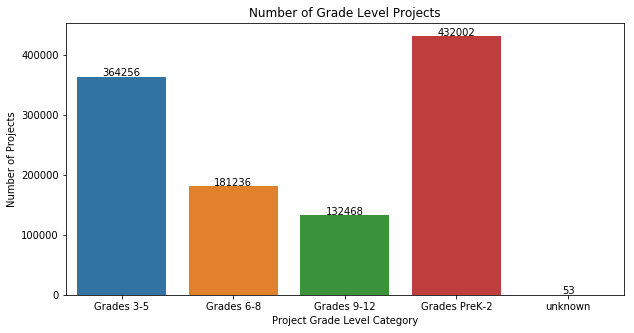

In [73]:
fig, ax = plt.subplots(figsize=(10, 5))
g=sns.barplot(grade_level_count['Project Grade Level Category'], grade_level_count['Project ID'])
#add text
for i, row in grade_level_count.iterrows():
    g.text(i,row['Project ID'] + 1000,row['Project ID'], color='black', ha="center")
ax.set_title('Number of Grade Level Projects')
ax.set_ylabel("Number of Projects")
plt.show()

<a id='projecteda3'></a>
### 4.3.3 Word Cloud of Project Need Statement
Displays the frequently wanted items from the need statement

In [74]:
# combine all text from need statements
text = projects_df['Project Need Statement'].str.cat(sep=' ')
stop_words = ('ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into',
'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 
'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 
'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so','can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 
'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a,' 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than', 'students','needs', 'need', 'classroom', 'learning', 'help',
'learn', 'us'
)

(-0.5, 799.5, 499.5, -0.5)

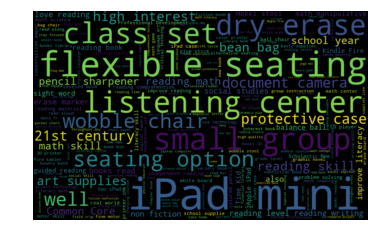

In [75]:
# Generate a word cloud image
wordcloud = WordCloud(width=800, height=500, stopwords=stop_words).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [110]:
projects_df.to_csv("adj_projects.csv", index=False)
del projects_df, fully_funded_dif, wordcloud, text, grade_level_count, project_impute_expire, expire_date_null, added_days
gc.collect()

0

It seems iPad mini, flexible seating, listening center are a few things most projects require. 

<a id='teacher'></a>
# 5. Teacher Data

Variables|Description
--|--
Teacher ID| Unique identifier of a teacher.
Teacher Prefix| “Mrs.”, “Ms.”, “Mr.”, “Teacher” (gender neutral option) chosen by teacher during account creation.
Teacher First Project Posted Date| Date on which the teacher’s first project was posted.

In [77]:
teachers_df.head()

,Teacher ID,Teacher Prefix,Teacher First Project Posted Date
0,00000f7264c27ba6fea0c837ed6aa0aa,Mrs.,2013-08-21
1,00002d44003ed46b066607c5455a999a,Mrs.,2016-10-23
2,00006084c3d92d904a22e0a70f5c119a,Mr.,2016-09-08
3,0000a9af8b6b9cc9e41f53322a8b8cf1,Ms.,2015-10-25
4,0000d4777d14b33a1406dd6c9019fe89,Ms.,2017-02-10


In [78]:
teachers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402900 entries, 0 to 402899
Data columns (total 3 columns):
Teacher ID                           402900 non-null object
Teacher Prefix                       402872 non-null object
Teacher First Project Posted Date    402900 non-null object
dtypes: object(3)
memory usage: 9.2+ MB


In [79]:
teachers_df.describe()

,Teacher ID,Teacher Prefix,Teacher First Project Posted Date
count,402900,402872,402900
unique,402900,6,4699
top,e0cca62e85acc34a928d879b6960cc69,Mrs.,2015-09-13
freq,1,202142,2067


In [80]:
teachers_df['Teacher Prefix'].unique()

array(['Mrs.', 'Mr.', 'Ms.', 'Teacher', 'Dr.', nan, 'Mx.'], dtype=object)

<a id='teacherstats'></a>
## 5.1 Summary Statistics Highlights

This is a relatively small dataset. It provides information on the teacher's prefix and their first post date. 
- Interestingly, there is a prefix Mx. (gender neutral). But there's also missing values which cannot be correctly infered without more information.
- Most teacher's first project posting is on 2015-09-13.

In [81]:
# correct the date format
teachers_df['Teacher First Project Posted Date'] = pd.to_datetime(teachers_df['Teacher First Project Posted Date']\
                                                                  , format='%Y-%m-%d')

<a id='teachereda'></a>
## 5.2 EDA

<a id='teachereda1'></a>
### 5.2.1 Number of Teachers by Prefix

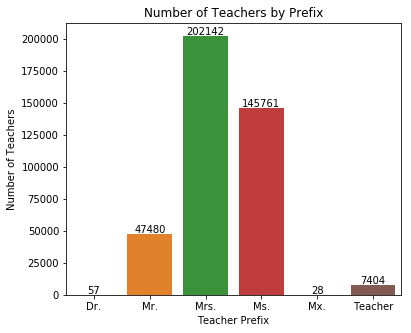

In [82]:
#chart preprocessing
teacher_prefix_count = teachers_df.groupby('Teacher Prefix').count()['Teacher ID'].reset_index()
fig, ax = plt.subplots(figsize=(6, 5))
g=sns.barplot(teacher_prefix_count['Teacher Prefix'], teacher_prefix_count['Teacher ID'])
for i, row in teacher_prefix_count.iterrows():
    g.text(i,row['Teacher ID'] + 1000,row['Teacher ID'], color='black', ha="center")
ax.set_title('Number of Teachers by Prefix')
ax.set_ylabel("Number of Teachers")
plt.show()

In [83]:
del teachers_df
gc.collect()

2524

<a id='school'></a>
# 6. School Data

Variables|Description
--|--
School ID| Unique identifier of a school.
School Name| Name of the school.
School Metro Type| One of four categories describing metro type, or urbanicity, of school area.
School Percentage Free Lunch| Integer describing percentage of students qualifying for free or reduced lunch, obtained from NCES data. For schools without NCES data, a district average is used.
School State| The state of the school that the teacher was teaching at at the time the project was posted.
School Zip| The zip code of the school that the teacher was teaching at at the time the project was posted.
School City| The city of the school that the teacher was teaching at at the time the project was posted.
School County| The county of the school that the teacher was teaching at at the time the project was posted.
School District| The district of the school that the teacher was teaching at at the time the project was posted.

In [84]:
schools_df.head()

,School ID,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
0,00003e0fdd601b8ea0a6eb44057b9c5e,Capon Bridge Middle School,rural,56.0,West Virginia,26711,Capon Bridge,Hampshire,Hampshire Co School District
1,00004e32a448b4832e1b993500bf0731,The Woodlands College Park High School,urban,41.0,Texas,77384,The Woodlands,Montgomery,Conroe Ind School District
2,0002021bb799f28de224f1acc1ff08c4,Samantha Smith Elementary School,suburban,2.0,Washington,98074,Sammamish,King,Lake Washington Sch Dist 414
3,0004604f675212a8cac1161338265196,Kingsbury Country Day School,unknown,76.0,Michigan,48370,Oxford,Oakland,Michigan Dept Of Education
4,0004c9d50bcf0cea990f844e58b5e2c3,Redwater Elementary School,rural,50.0,Texas,75573,Redwater,Bowie,Redwater Ind Sch District


In [85]:
schools_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72993 entries, 0 to 72992
Data columns (total 9 columns):
School ID                       72993 non-null object
School Name                     72993 non-null object
School Metro Type               72993 non-null object
School Percentage Free Lunch    71852 non-null float64
School State                    72993 non-null object
School Zip                      72993 non-null int64
School City                     72766 non-null object
School County                   72991 non-null object
School District                 72993 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 5.0+ MB


In [86]:
schools_df.describe()

,School Percentage Free Lunch,School Zip
count,71852.000000,72993.000000
mean,58.556115,53382.093406
std,25.508378,29131.096568
min,0.000000,705.000000
25%,40.000000,29554.000000
50%,61.000000,53095.000000
75%,80.000000,78572.000000
max,100.000000,99950.000000


In [87]:
schools_df.describe(include='O')

,School ID,School Name,School Metro Type,School State,School City,School County,School District
count,72993,72993,72993,72993,72766,72991,72993
unique,72993,56831,5,51,10400,1782,10852
top,a5993a2be95677553cefc05780af3daf,Lincoln Elementary School,suburban,California,New York City,Los Angeles,New York City Dept Of Ed
freq,1,203,22992,8457,2051,2110,1718


<a id='schoolstats'></a>
## 6.1 Summary Statistics Highlights

- Missing values in 'School Percentage Free Lunch', 'School City','School County'
- A majority of schools are suburban in 'School Metro Type'
- Most 'School City' is based in New York City.

<a id='schoolclean'></a>
## 6.2 Cleaning
Things to do:
- Check missing data

<a id='schoolmissing'></a>
### 6.2.1 Missing data

In [88]:
missing_values_count = schools_df.isnull().sum()
missing_values_count

School ID                          0
School Name                        0
School Metro Type                  0
School Percentage Free Lunch    1141
School State                       0
School Zip                         0
School City                      227
School County                      2
School District                    0
dtype: int64

Percentage Free Lunch is missing, it may be provided by the government, but unfortunately beyond the scope of this project. Therefore, it will be left alone. 

We should explore the City and County's missing data.

In [89]:
#check School City missing data
schools_df.loc[schools_df['School City'].isnull()].head()

,School ID,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
287,0105b4eff46d80be26b08489ba173ac9,Briya Public Charter School - Adams Morgan,urban,98.0,District of Columbia,20009,NaN,District Of Columbia,Dc Public Schools
618,021ba96a0f6cbbe0a992ea8f8f6ebf24,Choice Academy,urban,NaN,District of Columbia,20002,NaN,District Of Columbia,Dc Public Schools
760,028b4f7a4087d0b799f496d88460b59a,Murch Elementary School,urban,7.0,District of Columbia,20008,NaN,District Of Columbia,Dc Public Schools
981,03459ee7b2faf5ca25af3b36b295b4a2,M C Terrell Elementary School,urban,95.0,District of Columbia,20032,NaN,District Of Columbia,Dc Public Schools
1478,04f758bb12efab4d0257aa232ff10335,KIPP DC-Northeast Academy,urban,77.0,District of Columbia,20002,NaN,District Of Columbia,[State Run]


In [90]:
schools_df.loc[schools_df['School City'].isnull()]['School County'].unique()

array(['District Of Columbia', 'Hennepin'], dtype=object)

By viewing the missing school's city by school County, we can see ['District Of Columbia'](https://en.wikipedia.org/wiki/Washington,_D.C.) and 'Hennepin'. It makes sense 'District Of Columbia doesn't have a city, but the school in 'Hennepin' should have a city. 

In [91]:
# View all schools in Hennepin
schools_df.loc[schools_df['School Zip']==55427]

,School ID,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
7222,188d2fa3ef5deeed66ba1cda9785c6f8,Robbinsdale Spanish Imm School,suburban,17.0,Minnesota,55427,NaN,Hennepin,Robbinsdale Ind Sch Dist 281
10095,22a7f1f6e4af5e1d30f5fdb35c363507,School of Engineering & Arts,suburban,34.0,Minnesota,55427,Minneapolis,Hennepin,Robbinsdale Ind Sch Dist 281
24130,53f83a84911317bf5d4d684adcac328b,Highview Alternative High School,suburban,52.0,Minnesota,55427,Golden Valley,Hennepin,Robbinsdale Ind Sch Dist 281
40227,8cbdae4cbbc7a40caed12e6681277c95,Sandburg Middle School,suburban,44.0,Minnesota,55427,Golden Valley,Hennepin,Robbinsdale Ind Sch Dist 281
44726,9ca754943bc493f4f3d4d52dbc2e9556,H O Sonnesyn Elementary School,suburban,56.0,Minnesota,55427,New Hope,Hennepin,Robbinsdale Ind Sch Dist 281


By doing a bit of googling, we find the school is based near Minneapolis

In [92]:
# Assign Minneapolis to the school's missing city
schools_df.loc[schools_df.index==7222,'School City'] = 'Minneapolis'

Next we check the missing school county

In [93]:
# view all missing county
schools_df.loc[schools_df['School County'].isnull()]

,School ID,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
22039,4cbebe2dd862dd30b6d29f7416fa3823,Manassas Park Elementary School,suburban,59.0,Virginia,20111,Manassas Park,NaN,Manassas Park City Sch Dist
22076,4cdde907361cc3210751fd8892c64a97,LIVE OAK MIDDLE SCHOOL,unknown,100.0,Louisiana,70706,Denham Springs,NaN,Louisiana Dept Of Education


We should explore zipcode 20111 of the Manassas Park Elementary School.

In [94]:
schools_df.loc[schools_df['School Zip']==20111]

,School ID,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
11371,2722b18426401243dac317139a4e84cf,Loch Lomond Elementary School,suburban,79.0,Virginia,20111,Manassas,Prince William,Prince William Co Public Sd
15490,35a558231b38dcc78e4feb4bb7826239,Signal Hill Elementary School,suburban,22.0,Virginia,20111,Manassas,Prince William,Prince William Co Public Sd
19798,44d6d51605d641dd33154aae481f6721,New Dominion Alternative Center,suburban,41.0,Virginia,20111,Manassas,Prince William,Prince William Co Public Sd
22039,4cbebe2dd862dd30b6d29f7416fa3823,Manassas Park Elementary School,suburban,59.0,Virginia,20111,Manassas Park,NaN,Manassas Park City Sch Dist
31547,6def004aa1a469edc5b6b928ce723655,Manassas Park Middle School,suburban,59.0,Virginia,20111,Manassas Park,Prince William,Manassas Park City Sch Dist
34044,76df2bd13f126c91931e88973c618027,Osbourn Park High School,suburban,41.0,Virginia,20111,Manassas,Prince William,Prince William Co Public Sd
61253,d6a917d6def0dbc83183150b8b12b386,Cougar Elementary School,suburban,66.0,Virginia,20111,Manassas Park,Manassas City,Manassas Park City Sch Dist
62666,db8f969bac57e5e7aaa75c526ffecc71,Yorkshire Elementary School,suburban,76.0,Virginia,20111,Manassas,Prince William,Prince William Co Public Sd


By looking at the districting in google maps, the school county is based in Manassas City

In [95]:
# assign Manassas City to the missing county
schools_df.loc[schools_df.index==22039,'School County'] = 'Manassas City'

We check the second missing county by zipcode 70706

In [96]:
schools_df.loc[schools_df['School Zip']==70706]

,School ID,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
17397,3c6214e06ef5b6aafb58eddc96e060e4,Live Oak Middle School,suburban,39.0,Louisiana,70706,Denham Springs,Livingston,Livingston Parish School Dist
21512,4aea2d60573e3658f8dd46c4ec367a6e,Live Oak Junior High,unknown,NaN,Louisiana,70706,Denham Spgs,Livingston,Livingston Parish School Dist
22076,4cdde907361cc3210751fd8892c64a97,LIVE OAK MIDDLE SCHOOL,unknown,100.0,Louisiana,70706,Denham Springs,NaN,Louisiana Dept Of Education
49487,ad51da6769b7e129eb1b7ce0b049388b,Live Oak High School,unknown,54.0,Louisiana,70706,Denham Springs,Livingston,Livingston Parish School Dist
57110,c848ca2c599819c9ccc9d83f46cde866,Live Oak Elementary School,suburban,47.0,Louisiana,70706,Denham Springs,Livingston,Livingston Parish School Dist
69838,f4a7bb9e43a58d2390ec8a4486ece676,North Live Oak Elementary School,suburban,39.0,Louisiana,70706,Watson,Livingston,Livingston Parish School Dist
72958,ffe07bbef03fb96ffd7ab3e38929693b,South Live Oak Elementary School,suburban,46.0,Louisiana,70706,Denham Springs,Livingston,Livingston Parish School Dist


Same as above, we find the county is in Livingston

In [97]:
# assign Livingston
schools_df.loc[schools_df.index==22076,'School County'] = 'Livingston'

<a id='schooleda'></a>
## 6.3 EDA

<a id='schooleda1'></a>
### 6.3.1 Number of School by Metro Types

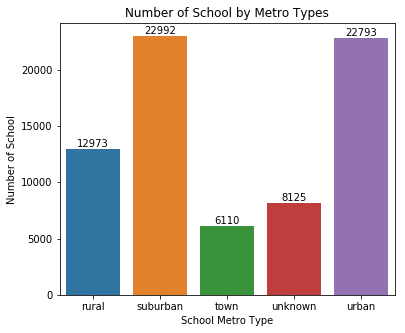

In [98]:
# Chart pre-processing
school_type_count = schools_df.groupby('School Metro Type').count()['School ID'].reset_index()
fig, ax = plt.subplots(figsize=(6, 5))
g=sns.barplot(school_type_count['School Metro Type'], school_type_count['School ID'])
for i, row in school_type_count.iterrows():
    g.text(i,row['School ID'] + 200,row['School ID'], color='black', ha="center")
ax.set_title('Number of School by Metro Types')
ax.set_ylabel("Number of School")
plt.show()

<a id='schooleda2'></a>
### 6.3.2 Distribution of Percentage Free Lunch

c:\users\lawko698\documents\projects\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


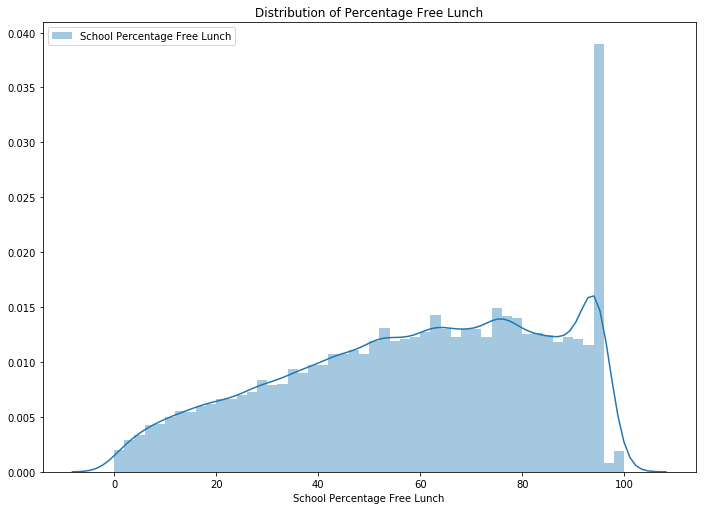

In [99]:
#chart pre-processing
distribution_lunch = schools_df.loc[schools_df['School Percentage Free Lunch'].notnull()]['School Percentage Free Lunch']
fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax.set_title('Distribution of Percentage Free Lunch')
sns.distplot(distribution_lunch, label = 'School Percentage Free Lunch')
plt.legend()
plt.show()

<a id='schooleda3'></a>
### 6.3.3 Number of Schools by State

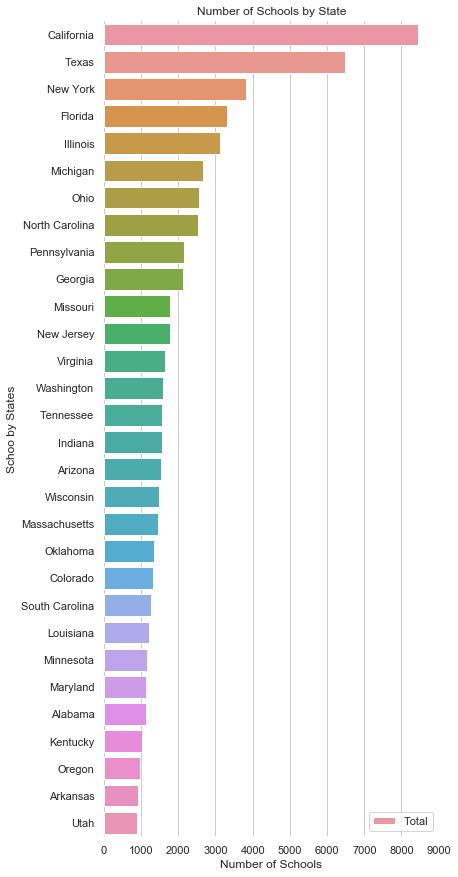

In [100]:
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the dataset
school_state_count=schools_df.loc[schools_df['School State'].notnull()].groupby('School State').count()['School ID'].reset_index().sort_values('School ID',ascending=False)[:30].reset_index(drop=True)

# Plot
#sns.set_color_codes("pastel")
sns.barplot(x="School ID", y="School State", data=school_state_count,
            label="Total")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 9000), ylabel="Schoo by States",
       xlabel="Number of Schools")
ax.set_title('Number of Schools by State')
sns.despine(left=True, bottom=True)

In [101]:
schools_df.to_csv("adj_schools.csv", index=False)
del schools_df
gc.collect()

2954

<a id='resource'></a>
# 7. Resources Data

Variables|Description
--|--
Project ID| Unique identifier of a project.
Resource Item Name| The name of the requested item, as it appears on the vendor’s website.
Resource Quantity| The quantity of the requested item.
Resource Unit Price| The price per unit of the requested item.
Resource Vendor Name| Name of the vendor.

In [102]:
resources_df.head()

,Project ID,Resource Item Name,Resource Quantity,Resource Unit Price,Resource Vendor Name
0,000009891526c0ade7180f8423792063,chair move and store cart,1.0,350.00,NaN
1,00000ce845c00cbf0686c992fc369df4,sony mdr zx100 blk headphones,40.0,12.86,CDW-G
2,00002d44003ed46b066607c5455a999a,"gaiam kids stay-n-play balance ball, grey",4.0,19.00,Amazon Business
3,00002d44003ed46b066607c5455a999a,cf520x - giant comfy pillows - set of 4,1.0,269.00,Lakeshore Learning Materials
4,00002d44003ed46b066607c5455a999a,"serta lounger, mini, sky blue",1.0,131.85,Amazon Business


In [103]:
resources_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7210448 entries, 0 to 7210447
Data columns (total 5 columns):
Project ID              object
Resource Item Name      object
Resource Quantity       float64
Resource Unit Price     float64
Resource Vendor Name    object
dtypes: float64(2), object(3)
memory usage: 275.1+ MB


In [104]:
resources_df.describe()

,Resource Quantity,Resource Unit Price
count,7.186149e+06,7.186138e+06
mean,2.816518e+00,5.341337e+01
std,8.866547e+00,1.863248e+02
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,7.260000e+00
50%,1.000000e+00,1.439000e+01
75%,2.000000e+00,3.640000e+01
max,4.125000e+03,9.708550e+04


In [105]:
resources_df.describe(include='O')

,Project ID,Resource Item Name,Resource Vendor Name
count,7210448,7209887,7128454
unique,1208649,1073886,31
top,07a021f92447be2ef4a6cb955bc4c1d1,trip,Amazon Business
freq,367,21233,3203262


<a id='resourcestats'></a>
## 7.1 Summary Statistics Highlights

To highlight a few items of interest from the summary above:

- Projects can purchase a number of items from vendors such as Project ID 07a021f92447be2ef4a6cb955bc4c1d1 brought a large number of books (367).
- There is a large number of amazon purchases
- Most of the purchases are for trips which do not require any purchases of resources which account for a large number" of the missing values.
- However, there is no way to fill in the missing values with limited information.

In [106]:
missing_values_count = resources_df.isnull().sum()
missing_values_count

Project ID                  0
Resource Item Name        561
Resource Quantity       24299
Resource Unit Price     24310
Resource Vendor Name    81994
dtype: int64

In [107]:
resources_df.loc[resources_df['Resource Item Name'].isnull()].head(10)

,Project ID,Resource Item Name,Resource Quantity,Resource Unit Price,Resource Vendor Name
15798,008c73956e40845a81acec28b578dd0a,NaN,NaN,NaN,NaN
23914,00d18fccd06542c715313a51ec496895,NaN,1.0,9.95,Blick Art Materials
30180,0106359fa2c04bb528f8aaabd27d736c,NaN,1.0,9.95,Blick Art Materials
38271,014b18458841ae8732a36c41a5b57050,NaN,NaN,NaN,NaN
54639,01dfe3f303bdaaf55dfde85606160d1c,NaN,10.0,1.27,Blick Art Materials
60355,0210bb9804d128a43cf6548016c8cc7a,NaN,NaN,NaN,NaN
83009,02e29654299ccf73ce6e6823bb931ca9,NaN,2.0,14.99,Nasco
84060,02ec1903b226555678c7bdf9853ff174,NaN,1.0,13.22,Blick Art Materials
91776,0332f892e70381169b3df7f6d8758c4e,NaN,15.0,1.27,Blick Art Materials
100557,0384b0d024beb5ef25384324e2f9076e,NaN,1.0,9.95,Blick Art Materials


In [108]:
resources_df.loc[resources_df['Resource Item Name'] == 'trip'].head(10)

,Project ID,Resource Item Name,Resource Quantity,Resource Unit Price,Resource Vendor Name
313,0002cf3c71d4f97876c326a42c81c0e8,trip,NaN,NaN,NaN
374,0003733341da1a9a83b472b92a5e6de8,trip,NaN,NaN,NaN
670,000630ab66464a738cab5036738075df,trip,NaN,NaN,NaN
1119,000a1083dd2c153db2ec328f15908f9c,trip,NaN,NaN,NaN
1191,000ae2414a4206cfa9586946784ca529,trip,NaN,NaN,NaN
1512,000d803803ffec70bb1ed35d0d990ad0,trip,NaN,NaN,NaN
1554,000e368332ae80ae7359a23bb7beab0e,trip,NaN,NaN,NaN
1653,000ecd50f38445843c0abe5cb72fe6f5,trip,NaN,NaN,NaN
2363,0016a7fe317e78b42bbf4479f6bf9f8e,trip,NaN,NaN,NaN
2699,0019a3a7fd224e4ccc984c2421c50141,trip,NaN,NaN,NaN


<a id='resourceeda'></a>
## 7.2 EDA

<a id='resourceeda1'></a>
## 7.2.1 Top 5 Resource Vendors

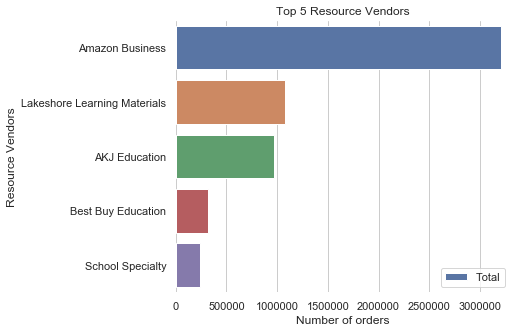

In [109]:
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 5))

# Load the dataset
project_resource_vendor_count=resources_df.loc[resources_df['Resource Vendor Name'].notnull()]\
.groupby('Resource Vendor Name').count()['Project ID'].reset_index().sort_values('Project ID',ascending=False)[:5]\
.reset_index(drop=True)

# Plot
sns.barplot(x="Project ID", y="Resource Vendor Name", data=project_resource_vendor_count,
            label="Total")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 3300000), ylabel="Resource Vendors",
       xlabel="Number of orders")
ax.set_title('Top 5 Resource Vendors')
sns.despine(left=True, bottom=True)

<a id='resourceeda2'></a>
## 7.2.2 Bottom 5 Resource Vendors

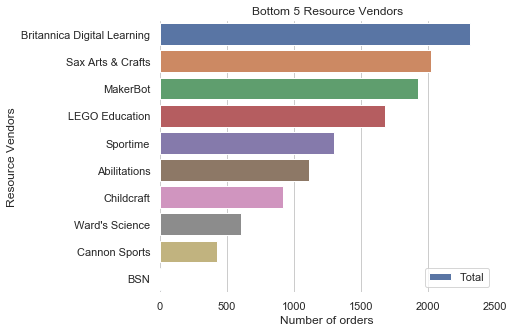

In [110]:
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 5))

# Load the dataset
project_resource_vendor_count=resources_df.loc[resources_df['Resource Vendor Name'].notnull()]\
.groupby('Resource Vendor Name').count()['Project ID'].reset_index().sort_values('Project ID',ascending=False)[-10:]\
.reset_index(drop=True)

# Plot
#sns.set_color_codes("pastel")
sns.barplot(x="Project ID", y="Resource Vendor Name", data=project_resource_vendor_count,
            label="Total")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 2500), ylabel="Resource Vendors",
       xlabel="Number of orders")
ax.set_title('Bottom 5 Resource Vendors')
sns.despine(left=True, bottom=True)

<a id='resourceeda3'></a>
## 7.2.3 Word Cloud

In [111]:
# text processing for Resource Item Name
text = resources_df['Resource Item Name'].str.cat(sep=' ')

(-0.5, 799.5, 499.5, -0.5)

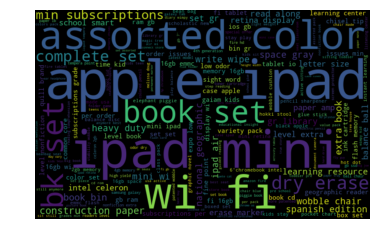

In [112]:
# Generate a word cloud image on resource items
wordcloud = WordCloud(width=800, height=500).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [113]:
del resources_df, text, wordcloud
gc.collect()

11536

<a id='donor'></a>
# 8. Donor Data

In [114]:
donor_df.head()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
0,00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,No,602
1,00002783bc5d108510f3f9666c8b1edd,Appomattox,other,No,245
2,00002d44003ed46b066607c5455a999a,Winton,California,Yes,953
3,00002eb25d60a09c318efbd0797bffb5,Indianapolis,Indiana,No,462
4,0000300773fe015f870914b42528541b,Paterson,New Jersey,No,075


In [115]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122640 entries, 0 to 2122639
Data columns (total 5 columns):
Donor ID            object
Donor City          object
Donor State         object
Donor Is Teacher    object
Donor Zip           object
dtypes: object(5)
memory usage: 81.0+ MB


In [116]:
donor_df.describe()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
count,2122640,1909543,2122640,2122640,1942580
unique,2122640,15204,52,2,1934
top,1adeb565501fd0b641928c83654bfdd8,Chicago,California,No,606
freq,1,34352,294695,1910355,34628


<a id='donorstats'></a>
## 8.1 Summary Statistics Highlights

To highlight a few items of interest from the summary above:

- Largest number of donors (by city) are located in Chicago
- Largest number of donors (by state) are located in California
- However, there are a large number of missing city and zip information

In [117]:
missing_values_count = donor_df.isnull().sum()
missing_values_count

Donor ID                 0
Donor City          213097
Donor State              0
Donor Is Teacher         0
Donor Zip           180060
dtype: int64

In [118]:
donor_df.loc[donor_df['Donor City'].isnull()].sample(10)

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
1732808,d0f93bc0e433601daba948d42dfa7e48,NaN,other,No,NaN
365524,2c0a8f67a1e468ce0f927f09fd807a84,NaN,New Jersey,No,NaN
208682,19247077b9b2f0c74dcf637030c45d35,NaN,Pennsylvania,No,NaN
284809,2252c67b2a54a5373d89c99de2f2ebca,NaN,Florida,No,339
270833,20a3ff3c3d3d4e8209c152efbe6fbb79,NaN,Kentucky,No,NaN
1631258,c4b168905a2b65fd7de2d5dec12f66e5,NaN,Illinois,No,604
1954703,ebb5c48b516e0ca57f15b6e34a034d31,NaN,California,No,NaN
748728,5a393ce1326441d7f5f6566f0db5ba66,NaN,Arizona,No,851
593333,47802900ca00832794c540b77f1c6f77,NaN,other,No,NaN
701033,548089e1bf0e44b8986a63ca80cf3aa1,NaN,New Jersey,No,NaN


<a id='donoreda'></a>
## 8.2 EDA

<a id='donoreda1'></a>
## 8.2.1 Top 5 Donor States

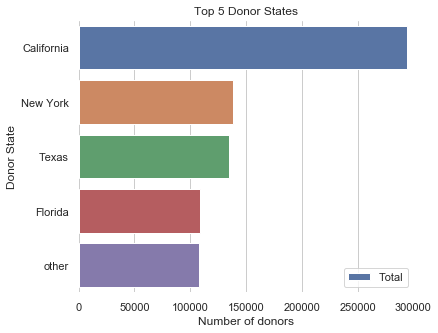

In [119]:
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 5))

# Load the dataset
donor_df_state_count=donor_df.loc[donor_df['Donor State'].notnull()].groupby('Donor State').count()['Donor ID']\
.reset_index().sort_values('Donor ID',ascending=False)[:5].reset_index(drop=True)

# Plot
sns.barplot(x="Donor ID", y="Donor State", data=donor_df_state_count,
            label="Total")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 300000), ylabel="Donor State",
       xlabel="Number of donors")
ax.set_title('Top 5 Donor States')
sns.despine(left=True, bottom=True)

<a id='donoreda2'></a>
## 8.2.2 Donor is Teacher

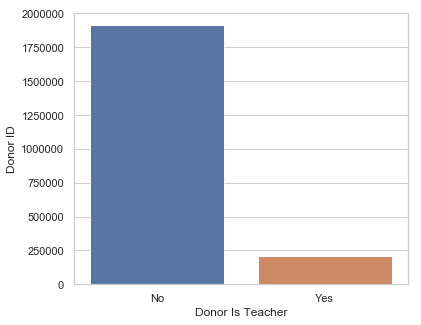

In [120]:
#chart preprocessing
donor_teacher_count = donor_df.groupby('Donor Is Teacher').count()['Donor ID'].reset_index()
fig, ax = plt.subplots(figsize=(6, 5))
g=sns.barplot(donor_teacher_count['Donor Is Teacher'], donor_teacher_count['Donor ID'])

In [121]:
del donor_df
gc.collect()

10934